### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from SEA import SEA 

### An example of how to use SEA

Text(0, 0.5, '$SEA (Tp)$')

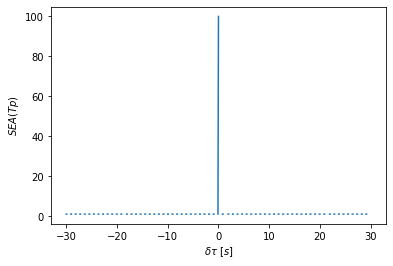

In [3]:
# User defined parameters
time_around        = '30s'                           # Time around identified events to consider
which_one          =  'Tp'                           #  The parameter on the y axis
mean_or_median     =  1                              # Create mean (T) or median (F)
resample_rate      =  '100ms'                        # The cadence to resample final timeseries.
condit_variables   = ['sigma_c', 'sigma_r']          # The variables to apply conditions on
conditions         = [['>=','<='], ['>=','<='] ]     # What kind of conditions?
threshold_values   = [[0.75, 1], [-0.15, 0.1]]       # Thresholds for each condition


# Create random sig_c, sig_r that take values within (0,1) and (-1,1) respectively
sig_c = np.random.rand(int(1e5))
sig_r =  np.random.uniform(-1, 1, int(1e5))

# Create T that takes a uniform falue
T     = np.ones(int(1e5))

# Increase T when conditions are met for min repoducible example
T[(sig_c>0.75) & ((sig_r>-0.15)& (sig_r<0.1))] = 100* T[((sig_c>0.75) &(sig_c<1)) & ((sig_r>-0.15)& (sig_r<0.1))]


# get current date and time
now = datetime.now()

# calculate end date as 5 hours from now
end_date = now + timedelta(hours=5)

# create datetime index with start date of now, end date of 5 hours from now, and frequency of 1 second
index = pd.date_range(start=now, end=end_date, periods=int(1e5))

# Create Dataframe
df = pd.DataFrame({'DateTime':index, 'sigma_c':sig_c, 'sigma_r':sig_r, 'Tp':T}).set_index('DateTime')



# Run SEA function
xvals, yvals, y_std, y_std_err_mean  = SEA(df,
                                              condit_variables,
                                              threshold_values,
                                              conditions,
                                              time_around,
                                              which_one,
                                              mean_or_median,
                                              resample_rate)

# Plot
plt.plot(xvals, yvals, ls='-', ms=1)

plt.xlabel(r'$\delta \tau ~ [s]$')
plt.ylabel(r'$SEA (Tp)$')